# Linear Regression with Statsmodels and Scikit-Learn

There are many ways to fit a linear regression. Most commonly, you'll use one of the following.
[scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html) and [statsmodels](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html). This notebook demos some common tasks using these libraries:
* Linear regressions in both scikit-learn and statsmodels
* Using [dummy variables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
* Multilinear regression
* Quadratic and polynomial regressions
* Exponential regressions

You can also create [polynomial fits with numpy](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) and more [general curve fits with scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

To get started let's load in the libraries that we'll need.

In [7]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from sklearn import linear_model

from IPython.display import Image

# MAGIC!
%matplotlib inline

For the first few examples we'll use the 'famous' [Iris dataset](http://archive.ics.uci.edu/ml/datasets/Iris). Seaborn provides a few data sets including this one. To get started, we'll load up iris and examine the relationship between petal length and petal width.

* Describe the types of variables of this dataset (e.g,. continuous/discrete)

* What data type is Iris?

In [8]:
# Load the data into a pandas dataframe
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* What is a sepal? 

If you are ever unsure about a key aspect of your dataset, look it up AND include the information that helped you understand it in your analysis. The person you're presenting to may not understand it either.

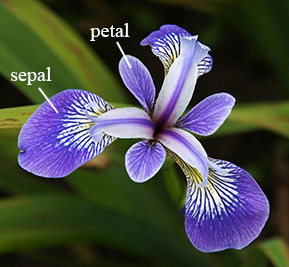

In [65]:
Image('https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg')

Before we build a model, let's try to understand this dataset better. This is a review of what we covered earlier.

* First, we'll use .describe()
* Presumably, this dataset of 150 samples isn't exhaustive of every Iris in existence. What statistical analyses are appropriate here if we want to know how well this dataset generalizes to all Iris flowers? 
* Are the Sepals or Petals longer?
* Which variable has the most amount of variance?

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Below, we specify which column is the x and which is the y variable. 

* Is this necessary?

* Should you explicitly declare which is which anyways?

* Is there a linear relationship between `petal_length` and `petal_width`? How do you determine that?

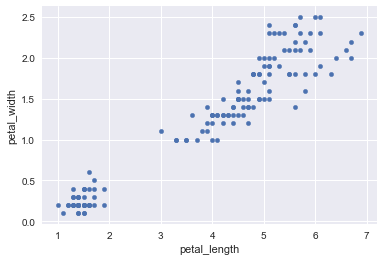

In [4]:
iris.plot(x='petal_length', y='petal_width', kind='scatter')

Let's fit a linear regression. Seaborn can [plot the data with a regression line](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html) so let's do that first (but it doesn't give us much in the way of statistics or numerical prediction).

* What is the name of the plot function here?

* What is the intercept here?

* What is the slope?

* How well does this model fit the data?

* Do you notice the light blue shading towards the end? What do you think that is?

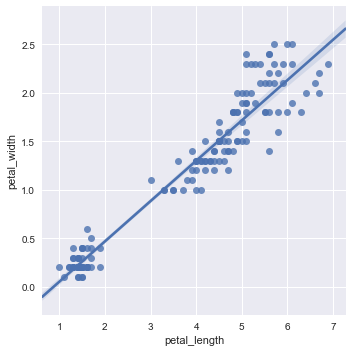

In [5]:
sns.lmplot(x='petal_length', y='petal_width', data=iris)
sns.plt.show()
#the intercept (statistics) is where x=0, -.03, below 0.0. slope is .5
#the shading is the error rate which is the confidence interval for the regression line

## Regression with 1 Feature

### Scikit-Learn Approach

* Now let's use scikit-learn to find the best fit line. First, we'll look at the docs.

In [10]:
#print linear_model.__doc__
print linear_model.LinearRegression.__doc__


    Ordinary least squares Linear Regression.

    Parameters
    ----------
    fit_intercept : boolean, optional
        whether to calculate the intercept for this model. If set
        to false, no intercept will be used in calculations
        (e.g. data is expected to be already centered).

    normalize : boolean, optional, default False
        If True, the regressors X will be normalized before regression.
        This parameter is ignored when `fit_intercept` is set to False.
        When the regressors are normalized, note that this makes the
        hyperparameters learnt more robust and almost independent of the number
        of samples. The same property is not valid for standardized data.
        However, if you wish to standardize, please use
        `preprocessing.StandardScaler` before calling `fit` on an estimator
        with `normalize=False`.

    copy_X : boolean, optional, default True
        If True, X will be copied; else, it may be overwritten.

    n_jobs

Now, we will apply it to our data.

* Note: scikit learn models accept numpy arrays/matricies, or dataframes
* What is the output?
* Why do we print two things from the `results` variable?

In [11]:
X = iris[['petal_length']] # <- Note that X needs to be a dataframe or array for scikit-learn!
y = iris['petal_width'] # <-- Same here

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
#print results.__doc__
print results.intercept_, results.coef_

-0.363075521319 [ 0.41575542]


In [ ]:
#the intercept, if length is 0 then width is going to be -.363, etc
#the .415 is in square brackets because there could be a bunch of items in an array

This means that our best fit line is:
$$y = a + b x$$

where $a = -0.363075521319$ and $b = 0.41575542$.

* Between a and b, which is the intercept and which is the slope?
* Why is one of them in a list?
* What do the X and Y variables describe?
* If you need to predict the Y variable for a new Iris flower you find, how would you apply the results of this regression?

See below. 

* What does "score" tell you?
* How accurate is this model?
* Python practice: Let's make this output prettier. How do you round to 2 decimal places? How do you output this as a percentage? How can we add the word "accuracy" to the same line? Example: 35.84% accuracy.
* Foreshadowing next class: What is wrong with this method of scoring our model? Is accuracy the right word?

In [74]:
print model.score(X, y)

0.92710983899


In [ ]:
#92.7% accuracy
#to make it a % multiply by 100 and then use round()
#IE: round(numberVar, 2) -> 2 is the number of decimal places

In [12]:
scorly = model.score(X,y)*100
print str(scorly.round(2)) + '%'

92.71%


### Statsmodel Approach

Next let's use `statsmodels`. It has *deceptively* similar syntax.

* Does X or Y come first? Compare this to Sci-kit learn.
* When are the X and Y variables passed in to the model? Compare model.fit between statsmodel and scikit learn.
* Compare `print(results.summary())` with just outputting `results.summary()`. Which do you like better?
* Compare the 95% Confidence Intervals to our original stat analysis. What does Confidence Interval mean here?

In [76]:
#only good for linear regression
#terminology is VERY DIFFERENT!! Look it up!!
model = sm.OLS(y, X) # they do y first!
results = model.fit()
# Statsmodels gives statistical panel output
#print(results.summary())
results.summary()
#we care about r-squared - measure of accuracy to our function/ how accurate the model is/ fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     4417.
Date:                Sun, 12 Mar 2017   Prob (F-statistic):          1.22e-112
Time:                        15:58:38   Log-Likelihood:                -8.7179
No. Observations:                 150   AIC:                             19.44
Df Residuals:                     149   BIC:                             22.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
petal_length     0.3365      0.005     66.463      0.000         0.327     0.347
==============================================================================
Omnibus:                       19.720   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.498
Skew:                           0.957   Prob(JB):                     7.90e-06
Kurtosis:                       3.311   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* What happened to our constant (a)? 

By default, statsmodels will not include a constant in its linear regression models. As a result, it is important to always add one with the [add_constant function](statsmodels.sourceforge.net/devel/generated/statsmodels.tools.tools.add_constant.html). 

* What is X_wc below? What are we create a new variable for X? What does _wc stand for?

Be careful to assign this result to a new X variable so you don't overwrite the original one!

In [13]:
X = iris[['petal_length']]
X_wc = sm.add_constant(X, prepend=False) # add a constant row for the intercept
y = iris[['petal_width']]

model = sm.OLS(y, X_wc)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 21 Mar 2017   Prob (F-statistic):           4.68e-86
Time:                        19:48:24   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
petal_length     0.4158      0.010     43.387   

Note that the coefficients are almost identical to what we saw before with scikit-learn.

* What is the difference between R^2 and output that scikit learn produced for `score()`?
* Is ($R^2=0.927$) a good fit?



## Regression with Multiple Features

Let's take a quick look all the variables in the dataset using [Seaborn's pairplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html).

* What types of variables does Pairplot include? Specifically, how does pairplot handle non-numerical variables (e.g., species)
* Try removing hue='species'. How does this look?
* What can you infer about the different species from this? Are they fairly separated or is it hard to draw clear boundries between them?
* Is there linearity within each species? In other words, how much of a stright line does each species create below?

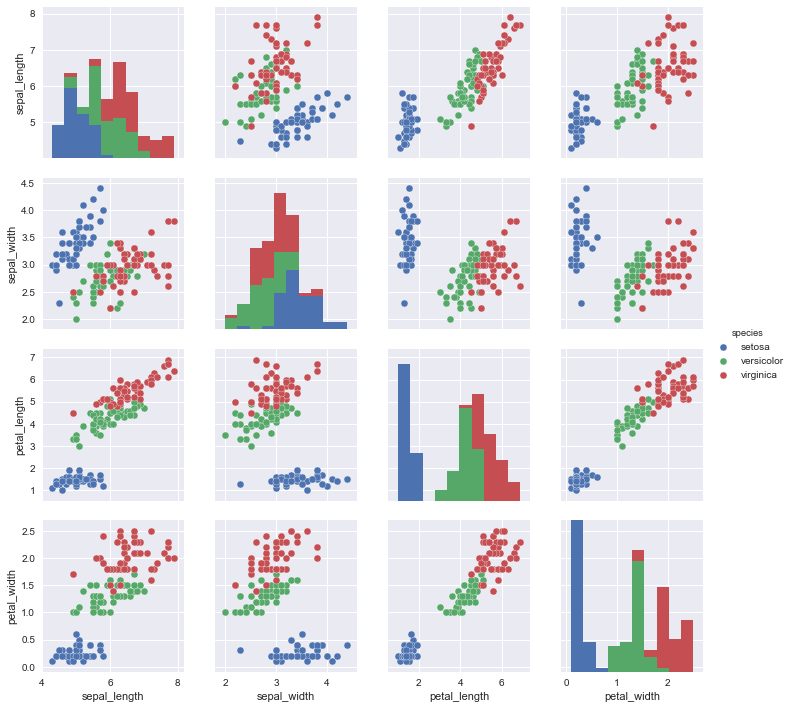

In [79]:
# Quick plot of the data using seaborn
sns.pairplot(iris, hue='species')#hue colors it by category
sns.plt.show()

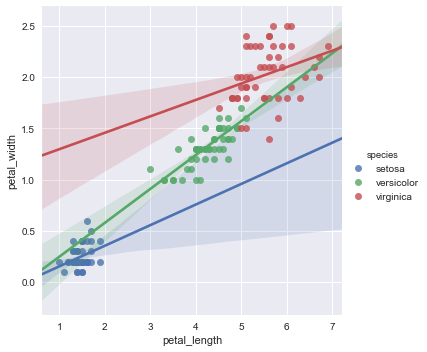

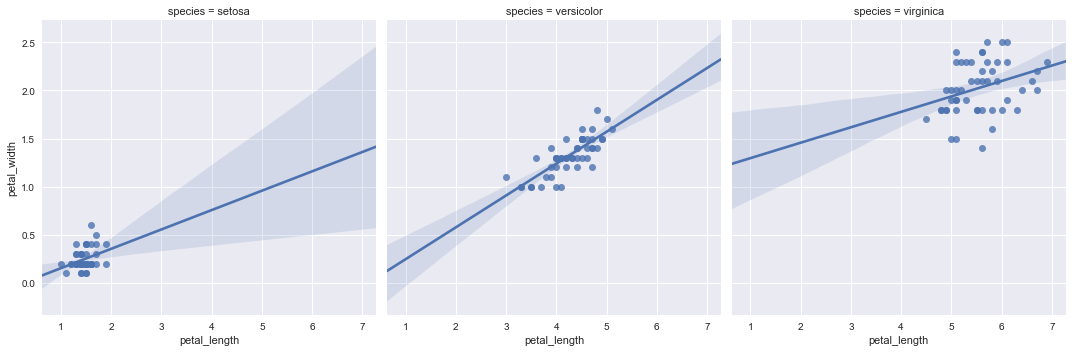

In [122]:
sns.lmplot(x='petal_length', y='petal_width', data=iris, hue='species') #hue species will break it out by species
sns.lmplot(x='petal_length', y='petal_width', data=iris, col='species') #column will produce different visual graphs
#for each category

It looks like species is an important variable so let's see if adding in the species helps. Since that feature is categorical, we need to use dummy variables.

* What will happen to the regression model if we add species as a variable?

* What does the concat method do?

* Why do we pass the parameter "axis=1"?

In [80]:
dummies = pd.get_dummies(iris['species'])
# Add to the original dataframe
iris = pd.concat([iris, dummies], axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


What does our PairPlot look like now?

* Interpret all the graphs on the first column.

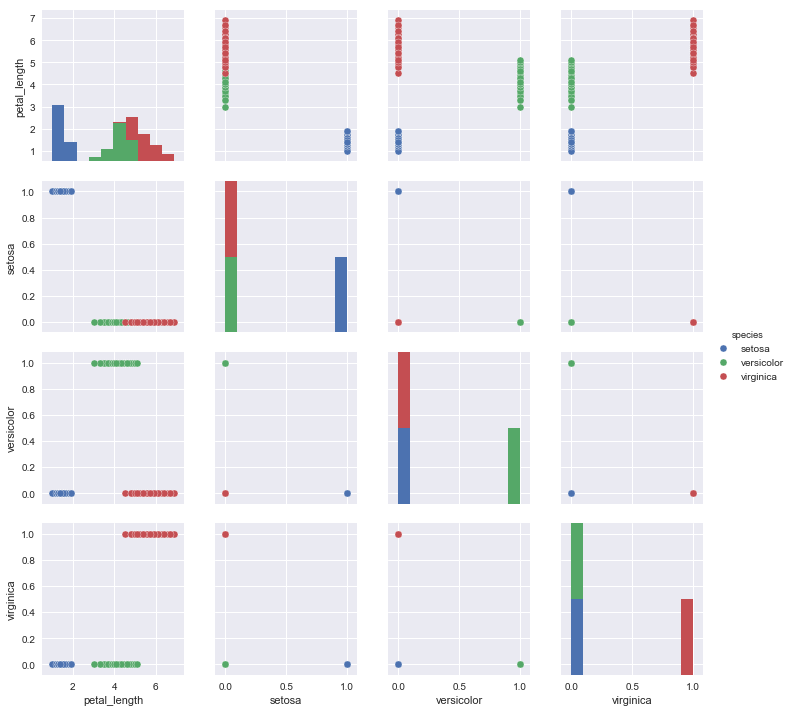

In [83]:
sns.pairplot(iris[['petal_length', 'setosa', 'versicolor', 'virginica', 'species']], hue='species')
#sns.pairplot(iris[['petal_length', 'setosa', 'versicolor', 'virginica', 'species']])
sns.plt.show()

Now we perform a multilinear regression with the dummy variables added to the petal length.

In [28]:
X = iris[['petal_length', 'setosa', 'versicolor', 'virginica']]
X_wc = sm.add_constant(X) # another way to add a constant row for an intercept
y = iris['petal_width']

model = sm.OLS(y, X_wc)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     845.5
Date:                Sun, 12 Mar 2017   Prob (F-statistic):           4.88e-92
Time:                        15:11:49   Log-Likelihood:                 46.704
No. Observations:                 150   AIC:                            -85.41
Df Residuals:                     146   BIC:                            -73.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            0.2501      0.098      2.561   

In this case it looks like we got a slight improvement from including the dummy variables. The dummy variables have a bigger impact on a fit between `petal_length` and `sepal_length`.

In [12]:
X = iris[['petal_length']]
X = sm.add_constant(X)
y = iris['sepal_length']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           1.04e-47
Time:                        08:27:52   Log-Likelihood:                -77.020
No. Observations:                 150   AIC:                             158.0
Df Residuals:                     148   BIC:                             164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            4.3066      0.078     54.939   

In [13]:
X = iris[['petal_length', 'setosa', 'versicolor', 'virginica']]
y = iris['sepal_length']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     249.4
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           3.10e-57
Time:                        08:28:14   Log-Likelihood:                -48.116
No. Observations:                 150   AIC:                             104.2
Df Residuals:                     146   BIC:                             116.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
petal_length     0.9046      0.065     13.962   

## Quadratic Fit

Next we look at a data set that needs a quadratic fit. Let's do both a linear and quadratic fit and compare.

* Don't worry about the lambda function below. It's just creating the scatterplot you see below

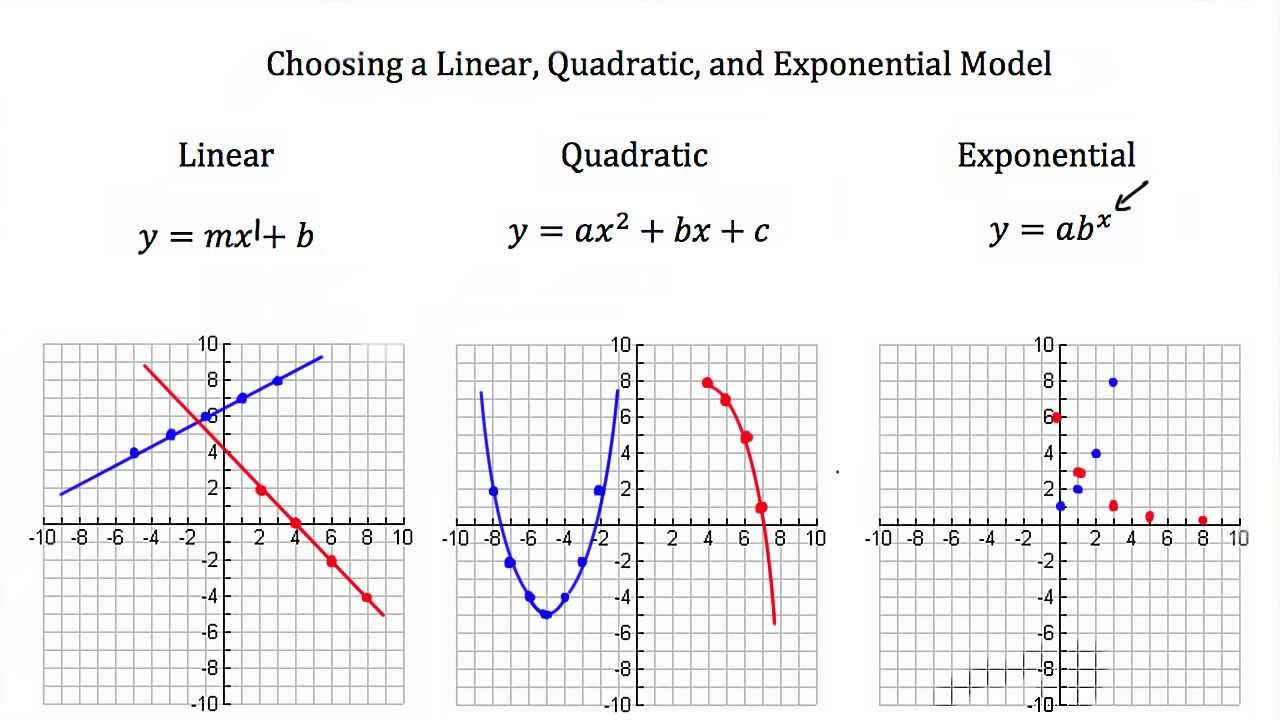

In [102]:
Image('https://i.ytimg.com/vi/biv_EjAy8g0/maxresdefault.jpg')

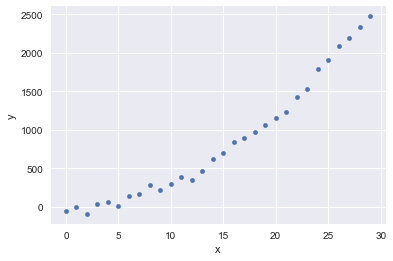

In [103]:
func = lambda x: 2 + 0.5 * x + 3 * x ** 2 + 5 * stats.norm.rvs(0, 10)
df = pd.DataFrame()
df['x'] = list(range(0, 30))
df['y'] = map(func, df['x'])
df.plot.scatter(x='x', y='y')

In [86]:
# Linear Fit
X = df['x']
X_wc = sm.add_constant(X, prepend=False) # add a constant row for the intercept
y = df['y']

model = sm.OLS(y, X_wc)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     447.2
Date:                Sun, 12 Mar 2017   Prob (F-statistic):           9.36e-19
Time:                        16:08:17   Log-Likelihood:                -200.26
No. Observations:                  30   AIC:                             404.5
Df Residuals:                      28   BIC:                             407.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x             88.5627      4.188     21.146      0.0

To add constant and non-constant terms for non-linear regression models, we'll use the [vander](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vander.html) function from numpy.

In [100]:
#print df['x']
print np.vander(df['x'], 3)

[[  0   0   1]
 [  1   1   1]
 [  4   2   1]
 [  9   3   1]
 [ 16   4   1]
 [ 25   5   1]
 [ 36   6   1]
 [ 49   7   1]
 [ 64   8   1]
 [ 81   9   1]
 [100  10   1]
 [121  11   1]
 [144  12   1]
 [169  13   1]
 [196  14   1]
 [225  15   1]
 [256  16   1]
 [289  17   1]
 [324  18   1]
 [361  19   1]
 [400  20   1]
 [441  21   1]
 [484  22   1]
 [529  23   1]
 [576  24   1]
 [625  25   1]
 [676  26   1]
 [729  27   1]
 [784  28   1]
 [841  29   1]]


In [88]:
# Quadratic Fit
X2 = df['x']
X2_van = np.vander(X2, 3) # add a constant and quadratic term
y = df['y']

model2 = sm.OLS(y, X2_van)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3955.
Date:                Sun, 12 Mar 2017   Prob (F-statistic):           4.77e-34
Time:                        16:08:31   Log-Likelihood:                -157.48
No. Observations:                  30   AIC:                             321.0
Df Residuals:                      27   BIC:                             325.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.7834      0.133     20.993      0.0

We see that the quadratic fit is better. We can plot the residuals in both cases to see how far off the models are in each case.

* This is a new type of visualization for us. What is on the X axis and what is on the Y axis?

* What does the straight line mean?

* What are the points on the graph?

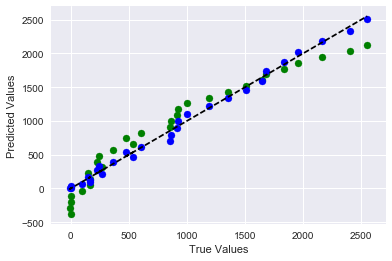

In [19]:
# Plot true values versus the predictions
plt.scatter(df['y'], results.predict(), color='g', label='Linear')
plt.scatter(df['y'], results2.predict(), color='b', label='Quadratic')

# Plot y=x reference line
plt.plot(df['y'], df['y'], '--', c='black')

# Labels
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

Although it's a little hard to tell from the plot (since both fits are good), the blue (quadratic) fit is closer to 'y=x', indicating a closer agreement with the true values and the model's predictions.

Higher order polynomial regressions are as easy as increasing the exponent parameter in `numpy.vander`.

Another way to visualize the fit of the regression is to look at the distribution of the residuals.

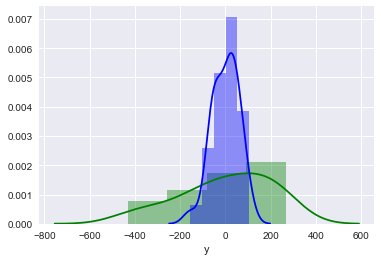

In [20]:
sns.distplot(results.predict()-df['y'], color='green')
sns.distplot(results2.predict()-df['y'], color='blue')

# Exponential functions

We can also transform our data before applying linear regression. This allows us to fit functions such as exponentials of the form $y=A e^{k x}$ using linear regression. Here's some exponentially distributed data.

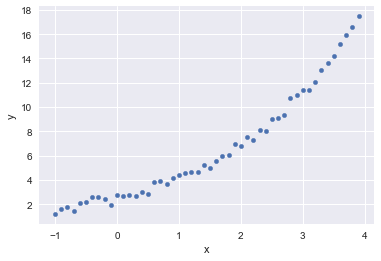

In [21]:
func = lambda x: 2.5 * np.exp(0.5 * x) + stats.norm.rvs(0, 0.3)
df = pd.DataFrame()
df['x'] = np.arange(-1, 4, 0.1)
df['y'] = map(func, df['x'])
df.plot.scatter(x='x', y='y')

If we take the log of the `y`-variable we get something more linear.

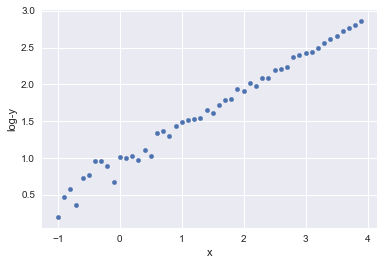

In [22]:
df['log-y'] = np.log(df['y'])
df.plot.scatter(x='x', y='log-y')

We can then use linear regression to determine $k$ and $\log A$, since taking the $\log$ of both sides of $y = A e^{k x}$ gives us $\log y = \log A + k x$.

In [34]:
X = df['x']
X_wc = sm.add_constant(X)
y = df['log-y']

model = sm.OLS(y, X_wc)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  log-y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     3474.
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           1.94e-46
Time:                        08:37:02   Log-Likelihood:                 52.860
No. Observations:                  50   AIC:                            -101.7
Df Residuals:                      48   BIC:                            -97.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.9349      0.017     54.349      0.0

As you can see the fit is very good.

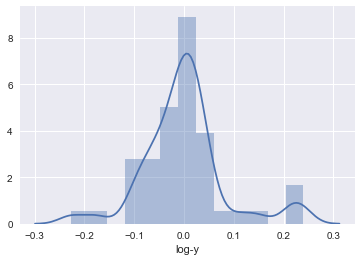

In [35]:
sns.distplot(results.predict() - y)

## Higher Order Polynomials

Main types:

* Linear
* Quadratic
* Cubic
* Quartic
* Quintic

### Quadratic

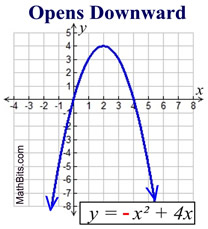

In [106]:
Image('https://mathbitsnotebook.com/Algebra1/Quadratics/GraphPra6.jpg')
Image('https://mathbitsnotebook.com/Algebra1/Quadratics/graphdowna.jpg')

### Cubic

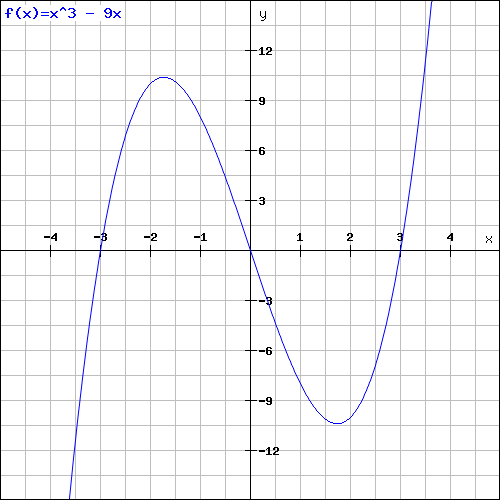

In [113]:
Image('http://1.bp.blogspot.com/-Kb1lMZ7RaV4/Tvc2UereH1I/AAAAAAAAAFI/M7-EuUT-05o/s1600/cubic+graph+2.png')

### Quartic and Quintic

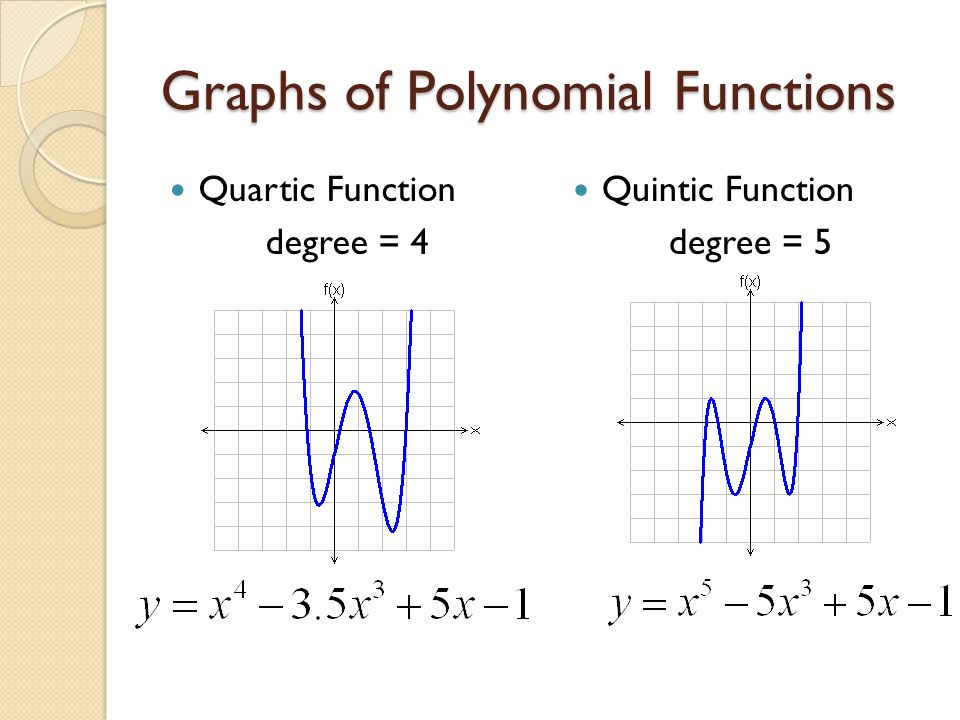

In [116]:
Image('http://images.slideplayer.com/27/9108314/slides/slide_8.jpg')

## Non-Linear Linear Regression Summary

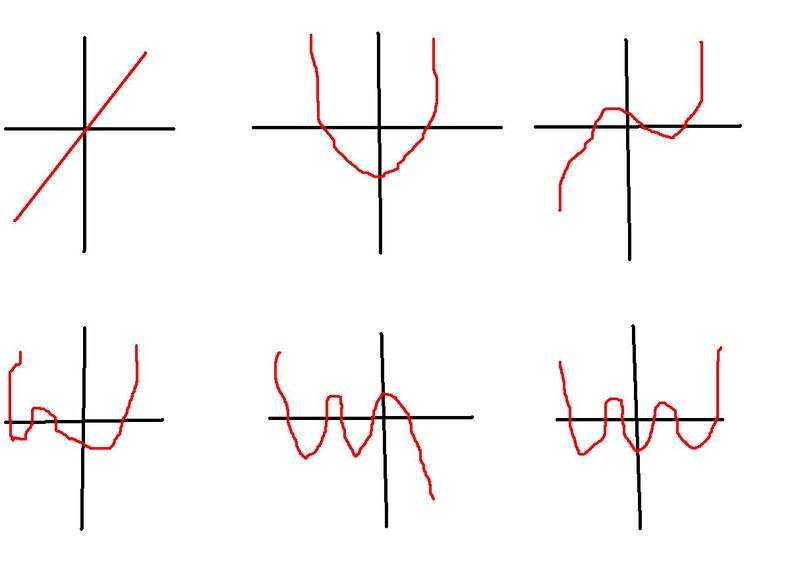

In [115]:
Image('http://i16.photobucket.com/albums/b16/musicalprincess988/graphs.jpg')